# Reading data from csv

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

df = pd.read_csv('enron_spam_data.csv')
display(df)

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


# Data Cleaning 

In [158]:
import re

def regexClean(message_content):
    # convert everything to string
    # getting a "passing a float" error otherwise
    message_content = str(message_content) 
    
    # remove all URLs
    message_content = re.sub(r'(http|https|ftp)://[a-zA-Z0-9\\./]+', ' ', str(message_content)) 

    # remove all emails
    message_content = re.sub(r'[A-Za-z0-9._\\-]+@[A-Za-z0-9-]*\\.[a-z]{2,3}','',str(message_content))

    # remove all tags
    # https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string
    message_content = re.sub(r'<[^<]+?>', '', str(message_content)) 

    # remove newline
    message_content = message_content.replace('\n', ' ')

    # convert all chars to lowercase
    message_content = message_content.lower()
    return message_content

# make a copy of the df 
df_with_punct_numb_removed = df.copy();

df['Cleaned_Message'] = df['Message'].apply(regexClean)

print(df[['Message', 'Cleaned_Message']].head())
df_with_punct_numb_removed.head()

                                             Message  \
0                                                NaN   
1  gary , production from the high island larger ...   
2             - calpine daily gas nomination 1 . doc   
3  fyi - see note below - already done .\nstella\...   
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...   

                                     Cleaned_Message  
0                                                nan  
1  gary , production from the high island larger ...  
2             - calpine daily gas nomination 1 . doc  
3  fyi - see note below - already done . stella -...  
4  fyi . - - - - - - - - - - - - - - - - - - - - ...  


,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


## punctuation and digits removed 

In [159]:
from string import punctuation

def punct_removal(message_content):
    message_content = str(message_content)
    
    # https://regexr.com/
    
    # remove digits
    message_content = re.sub(r'\d+', ' ', message_content)

    # remove all non-alphabetic characters
    message_content = message_content.replace(r'[^a-zA-Z]', '') 

    #remove punctuation
    # https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
    message_content = message_content.translate(str.maketrans('', '', punctuation))
    
    return message_content

df_with_punct_numb_removed['Cleaned_Message'] = df_with_punct_numb_removed['Message'].apply(punct_removal)

display(df_with_punct_numb_removed)

,Message ID,Subject,Message,Spam/Ham,Date,Cleaned_Message
0,0,christmas tree farm pictures,NaN,ham,1999-12-10,nan
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13,gary production from the high island larger b...
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14,calpine daily gas nomination doc
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14,fyi see note below already done \nstella\n ...
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,fyi \n forwarded by lauri...
...,...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29,hello welcome to gigapharm onlinne shop \npre...
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29,i got it earlier than expected and it was wrap...
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30,are you ready to rock on let the man in you r...
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30,learn how to last times longer in\nbed ...


# Stemming and Stop word removal

Stemming -> removes es, ies, s
dog, dogs -> dog

- snowball stemmer: Porter2, enhanced adv version of porter stemmer
- porter stemmer

tokenization

stop word removal: remove of, the and common prepositions and words that do not offer much new information

In [160]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

def stem_stopword_rem(message_content):
    message_content = str(message_content)

    # remove english stop words
    stop_words = stopwords.words('english')
    words = [eachword for eachword in message_content.split() if eachword not in stop_words]

    # stem words w Snowball stemmer
    stemmer = SnowballStemmer('english')
    stemmed = [stemmer.stem(eachword) for eachword in words]

    stemmed_stopword_removed_message = ' '.join(stemmed)

    return stemmed_stopword_removed_message

df_stem_stopword_removed = df_with_punct_numb_removed.copy()
df_stem_stopword_removed['Cleaned_Message'] = df_with_punct_numb_removed['Cleaned_Message'].apply(stem_stopword_rem)

display(df_stem_stopword_removed)


,Message ID,Subject,Message,Spam/Ham,Date,Cleaned_Message
0,0,christmas tree farm pictures,NaN,ham,1999-12-10,nan
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13,gari product high island larger block commenc ...
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14,calpin daili gas nomin doc
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14,fyi see note alreadi done stella forward stell...
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,fyi forward lauri allen hou ect pm kimber vaug...
...,...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29,hello welcom gigapharm onlinn shop prescri lin...
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29,got earlier expect wrap cautious impress speed...
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30,readi rock let man rise solitud show us societ...
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30,learn last time longer bed read plod net


In [161]:
display(df_with_punct_numb_removed)

,Message ID,Subject,Message,Spam/Ham,Date,Cleaned_Message
0,0,christmas tree farm pictures,NaN,ham,1999-12-10,nan
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13,gary production from the high island larger b...
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14,calpine daily gas nomination doc
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14,fyi see note below already done \nstella\n ...
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,fyi \n forwarded by lauri...
...,...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29,hello welcome to gigapharm onlinne shop \npre...
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29,i got it earlier than expected and it was wrap...
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30,are you ready to rock on let the man in you r...
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30,learn how to last times longer in\nbed ...


# TFIDF 

In [162]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df_with_punct_numb_removed['Cleaned_Message']).toarray()

# Convert the vectorized data to a DataFrame for better visualization
vectorized_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

# Display the first few rows of the vectorized data
print(vectorized_df.head())

    aa  ability  able     about  above  absolutely  abuse   ac  accept  \
0  0.0      0.0   0.0  0.000000    0.0         0.0    0.0  0.0     0.0   
1  0.0      0.0   0.0  0.021487    0.0         0.0    0.0  0.0     0.0   
2  0.0      0.0   0.0  0.000000    0.0         0.0    0.0  0.0     0.0   
3  0.0      0.0   0.0  0.000000    0.0         0.0    0.0  0.0     0.0   
4  0.0      0.0   0.0  0.000000    0.0         0.0    0.0  0.0     0.0   

   acceptance  ...   yo  york       you  young  your  yours  yourself  zero  \
0         0.0  ...  0.0   0.0  0.000000    0.0   0.0    0.0       0.0   0.0   
1         0.0  ...  0.0   0.0  0.011551    0.0   0.0    0.0       0.0   0.0   
2         0.0  ...  0.0   0.0  0.000000    0.0   0.0    0.0       0.0   0.0   
3         0.0  ...  0.0   0.0  0.034688    0.0   0.0    0.0       0.0   0.0   
4         0.0  ...  0.0   0.0  0.000000    0.0   0.0    0.0       0.0   0.0   

   zimin  zone  
0    0.0   0.0  
1    0.0   0.0  
2    0.0   0.0  
3    0.0   0

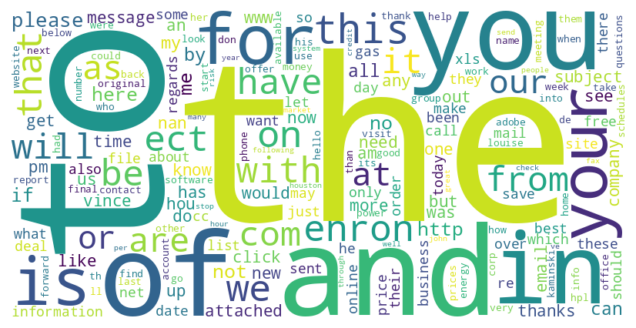

In [163]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud

term_freq = vectorized_df.sum(axis=0)

word_cloud_dict = dict(zip(vectorizer.get_feature_names_out(), term_freq))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


-------------------------------

# Data analysis

In [164]:
import pandas as pd

# Assuming you have a DataFrame df with a column 'Spam/Ham'

y = df['Spam/Ham']

value_counts = y.value_counts()
total_emails = len(y)
spam_percentage = (value_counts['spam'] / total_emails) * 100
ham_percentage = (value_counts['ham'] / total_emails) * 100

print("Spam Percentage:", spam_percentage)
print("Ham Percentage:", ham_percentage)


Spam Percentage: 50.928342626646106
Ham Percentage: 49.0716573733539


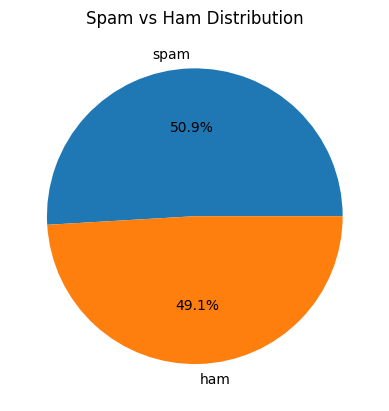

In [165]:

labels = value_counts.index
sizes = value_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Spam vs Ham Distribution')
plt.show()

In [166]:
df_with_punct_numb_removed['Word_Count'] = df_with_punct_numb_removed['Cleaned_Message'].apply(lambda x: len(x.split()))
mean_word_length = df_with_punct_numb_removed['Word_Count'].mean()
print("Mean Word Length in 'Cleaned_Message':", mean_word_length)

Mean Word Length in 'Cleaned_Message': 220.70269308340255


-------------------------------

# Random Forest on unstemmed data 

In [167]:
# Define the target variable
y = df['Spam/Ham'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [168]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9798339264531435
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      3276
        spam       0.97      0.99      0.98      3468

    accuracy                           0.98      6744
   macro avg       0.98      0.98      0.98      6744
weighted avg       0.98      0.98      0.98      6744



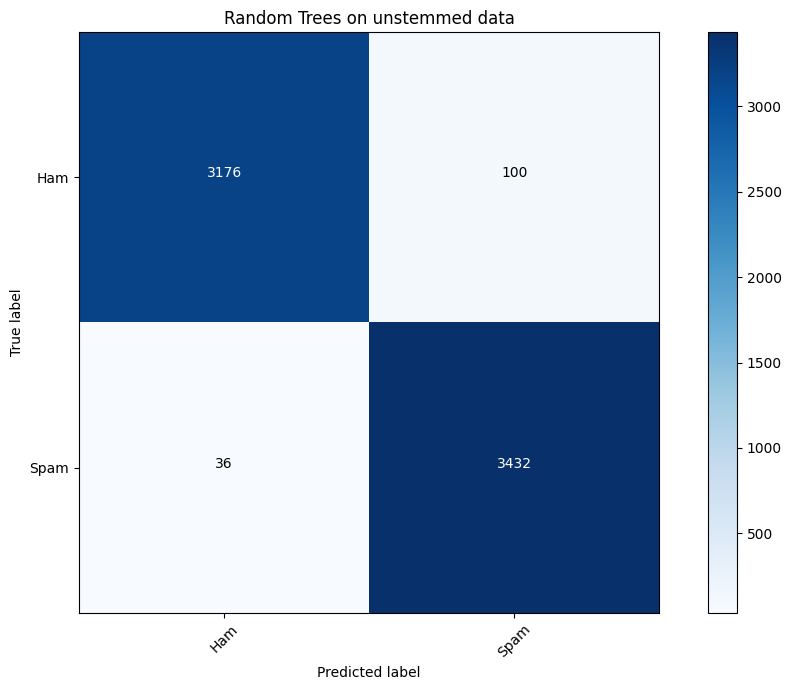

In [169]:
# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, class_labels=None, title='Confusion Matrix', cmap=plt.cm.Blues):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Ham', 'Spam'], rotation=45)
    plt.yticks(tick_marks, ['Ham', 'Spam'])
    
    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    

plot_confusion_matrix(y_test, y_pred, class_labels=None, title='Random Trees on unstemmed data')

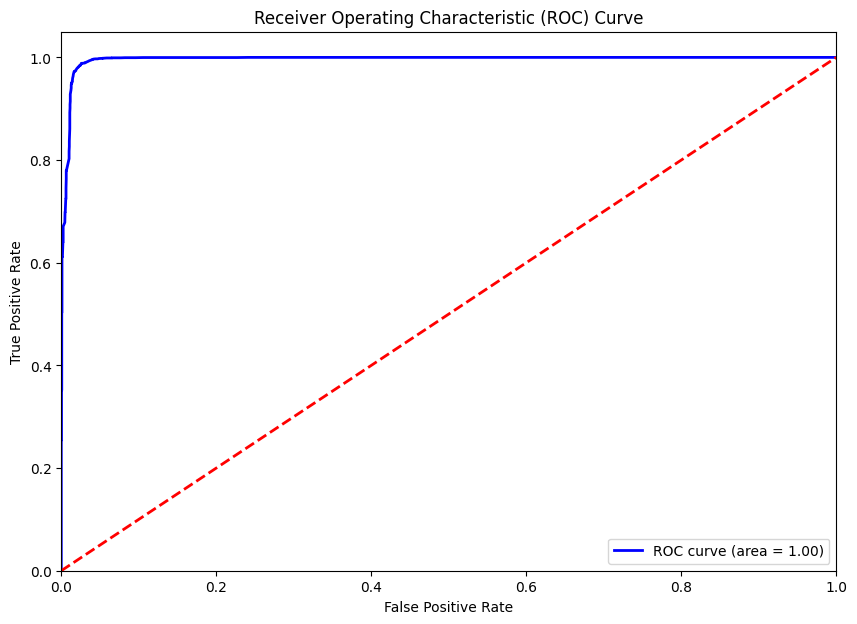

In [170]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

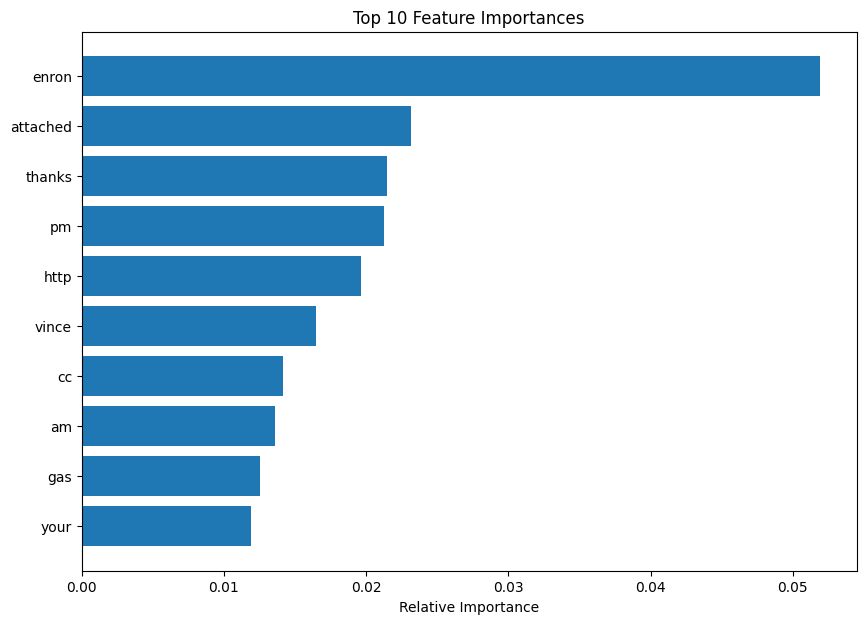

In [171]:
importances = model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i])[-10:]  # Top 10 features
plt.figure(figsize=(10, 7))
plt.barh(range(len(indices)), [importances[i] for i in indices], align='center')
plt.yticks(range(len(indices)), [vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Top 10 Feature Importances')
plt.show()

# Naive Bayes on unstemmed data

In [172]:
import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

start_time = time.time()
NaiveBayesmodel = MultinomialNB().fit(X_train, y_train)
training_time = time.time() - start_time
NaiveBayesmodel.fit(X_train, y_train)

start_time = time.time()
y_pred = NaiveBayesmodel.predict(X_test)
prediction_time = time.time() - start_time

Naive Bayes is a statistical classifier that performs probabilitstic prediction based on Bayes' Theorem. The "naive" infers to the assumption of independence between attributes. In reality, dependencies exist between variables therefore assuming conditional independence might lead to loss of accuracy. 

In [173]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

Accuracy: 0.9719750889679716
              precision    recall  f1-score   support

         ham       0.98      0.97      0.97      3276
        spam       0.97      0.98      0.97      3468

    accuracy                           0.97      6744
   macro avg       0.97      0.97      0.97      6744
weighted avg       0.97      0.97      0.97      6744

Training Time: 0.512941837310791 seconds
Prediction Time: 0.06530284881591797 seconds


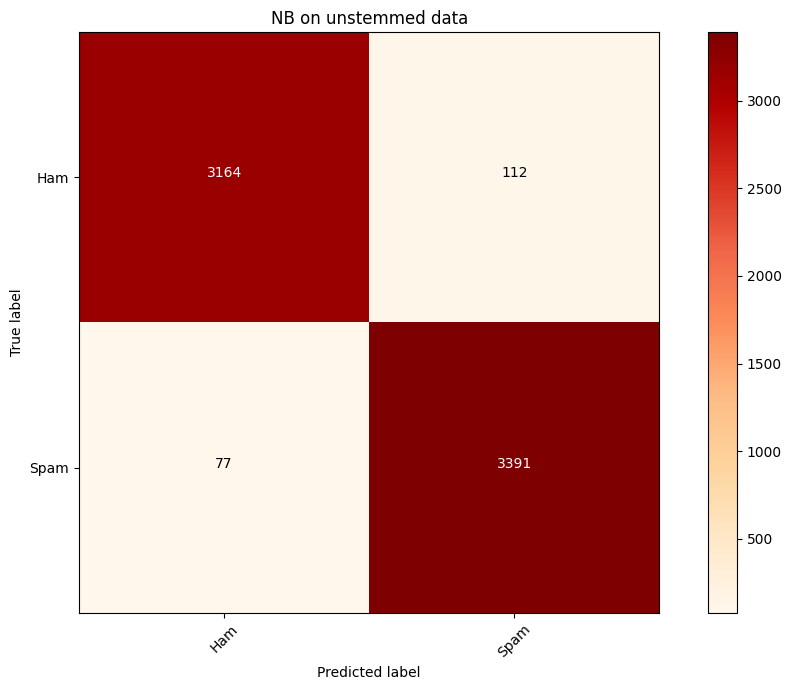

In [174]:
plot_confusion_matrix(y_test, y_pred, class_labels=None, title='NB on unstemmed data',cmap='OrRd')

## Cross validation

In [129]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(NaiveBayesmodel, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.96619217 0.96589055 0.97908943 0.97152603 0.95283998]
Mean accuracy: 0.9671076318501909


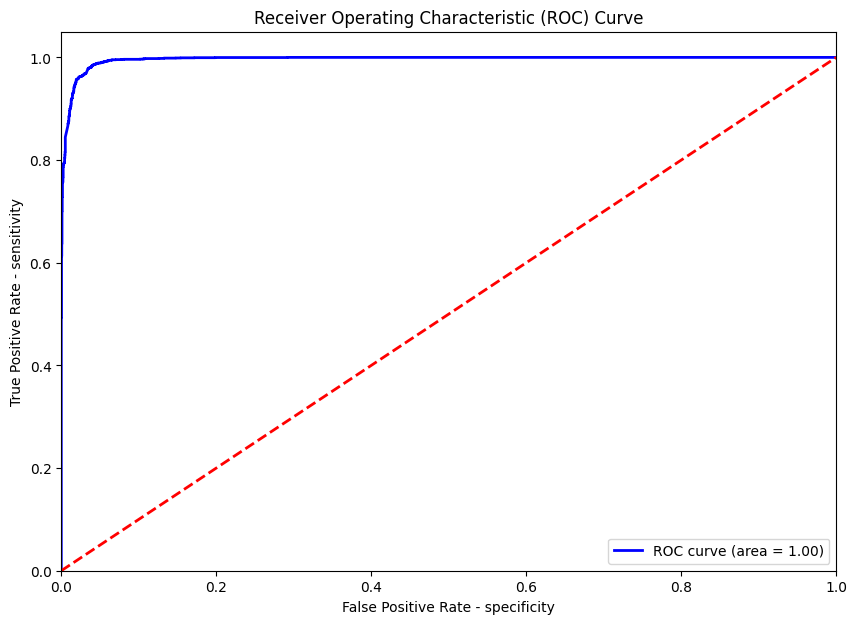

In [130]:
# ROC Curve
y_prob = NaiveBayesmodel.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - specificity')
plt.ylabel('True Positive Rate - sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve's y axis shows the true positive rate which is sensitivity and the x axis shows the false positive rate that is 1- specificity. TPR = TP/ TP + FN
FPR = FP/ FP + TN

## grid search to find alpha

Best Hyperparameters: {'alpha': 0.001}
Best Grid Search CV Score: 0.9749000416829464
Accuracy: 0.9737544483985765
              precision    recall  f1-score   support

         ham       0.98      0.97      0.97      3276
        spam       0.97      0.98      0.97      3468

    accuracy                           0.97      6744
   macro avg       0.97      0.97      0.97      6744
weighted avg       0.97      0.97      0.97      6744

Training Time: 15.592666149139404 seconds
Prediction Time: 0.06581377983093262 seconds


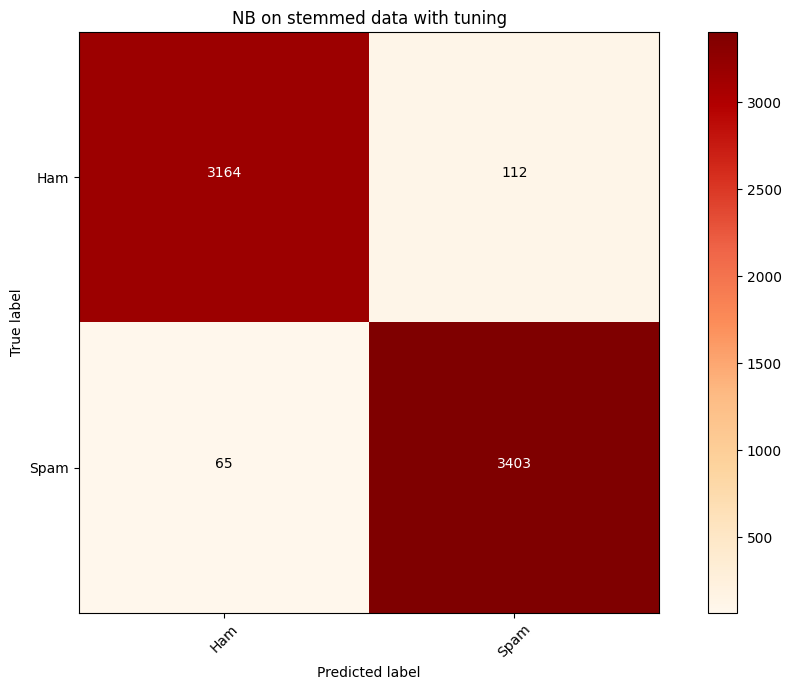

In [152]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],}

start_time = time.time()
grid_search = GridSearchCV(MultinomialNB(), parameter_grid, cv=5)
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

start_time = time.time()
y_pred = best_model.predict(X_test)
prediction_time = time.time() - start_time

print("Best Hyperparameters:", best_params)
print("Best Grid Search CV Score:", grid_search.best_score_)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")
plot_confusion_matrix(y_test, y_pred, class_labels=None, title='NB on unstemmed data with tuning',cmap='OrRd')

## Cross validation

In [153]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(NaiveBayesmodel, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.96723013 0.96885659 0.98250037 0.96781848 0.95372979]
Mean accuracy: 0.9680270731089875


# TFIDF on STEMMED, STOP WORD REMOVED 

In [133]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df_stem_stopword_removed['Cleaned_Message']).toarray()

# Convert the vectorized data to a DataFrame for better visualization
vectorized_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

# Display the first few rows of the vectorized data
print(vectorized_df.head())

    aa   ab  abil  abl  abroad  absenc  absolut  abus   ac  academ  ...  yes  \
0  0.0  0.0   0.0  0.0     0.0     0.0      0.0   0.0  0.0     0.0  ...  0.0   
1  0.0  0.0   0.0  0.0     0.0     0.0      0.0   0.0  0.0     0.0  ...  0.0   
2  0.0  0.0   0.0  0.0     0.0     0.0      0.0   0.0  0.0     0.0  ...  0.0   
3  0.0  0.0   0.0  0.0     0.0     0.0      0.0   0.0  0.0     0.0  ...  0.0   
4  0.0  0.0   0.0  0.0     0.0     0.0      0.0   0.0  0.0     0.0  ...  0.0   

   yesterday  yet  yield   yo  york  young  zero  zimin  zone  
0   0.000000  0.0    0.0  0.0   0.0    0.0   0.0    0.0   0.0  
1   0.000000  0.0    0.0  0.0   0.0    0.0   0.0    0.0   0.0  
2   0.000000  0.0    0.0  0.0   0.0    0.0   0.0    0.0   0.0  
3   0.054077  0.0    0.0  0.0   0.0    0.0   0.0    0.0   0.0  
4   0.000000  0.0    0.0  0.0   0.0    0.0   0.0    0.0   0.0  

[5 rows x 3000 columns]


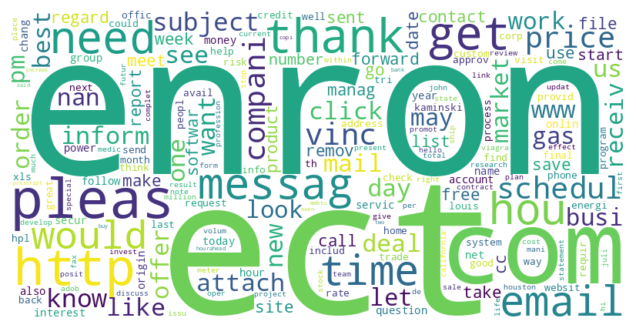

In [134]:
term_freq = vectorized_df.sum(axis=0)
word_cloud_dict = dict(zip(vectorizer.get_feature_names_out(), term_freq))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Random Forest on stemmed, stop word removed data

In [136]:
# Define the target variable
y = df['Spam/Ham'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [137]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9776097271648873
              precision    recall  f1-score   support

         ham       0.98      0.97      0.98      3276
        spam       0.97      0.98      0.98      3468

    accuracy                           0.98      6744
   macro avg       0.98      0.98      0.98      6744
weighted avg       0.98      0.98      0.98      6744



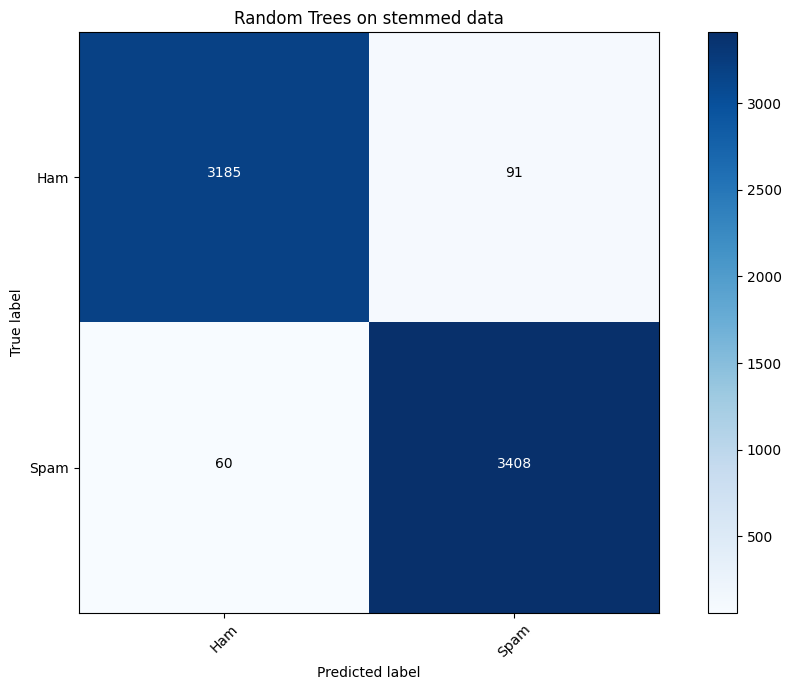

In [138]:
plot_confusion_matrix(y_test, y_pred, class_labels=None, title='Random Trees on stemmed data')

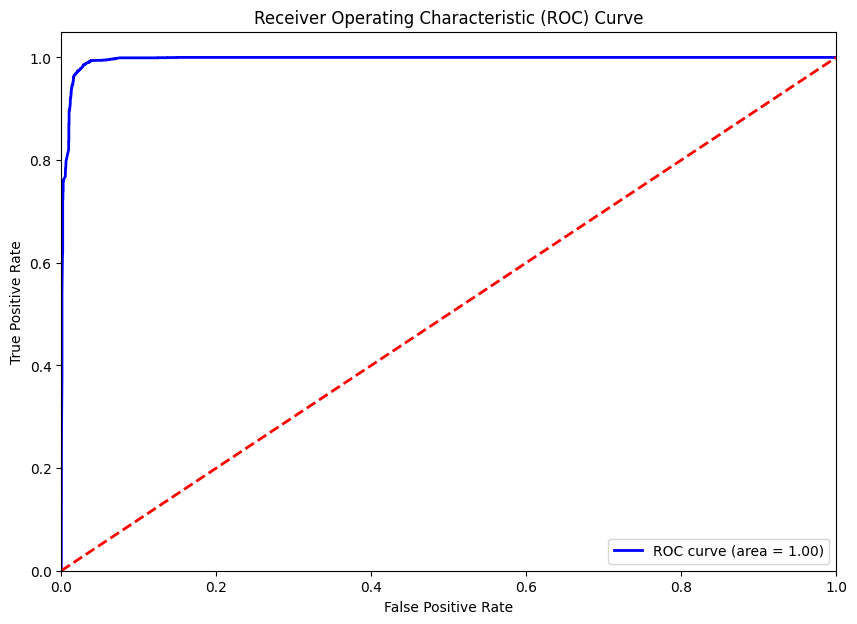

In [139]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

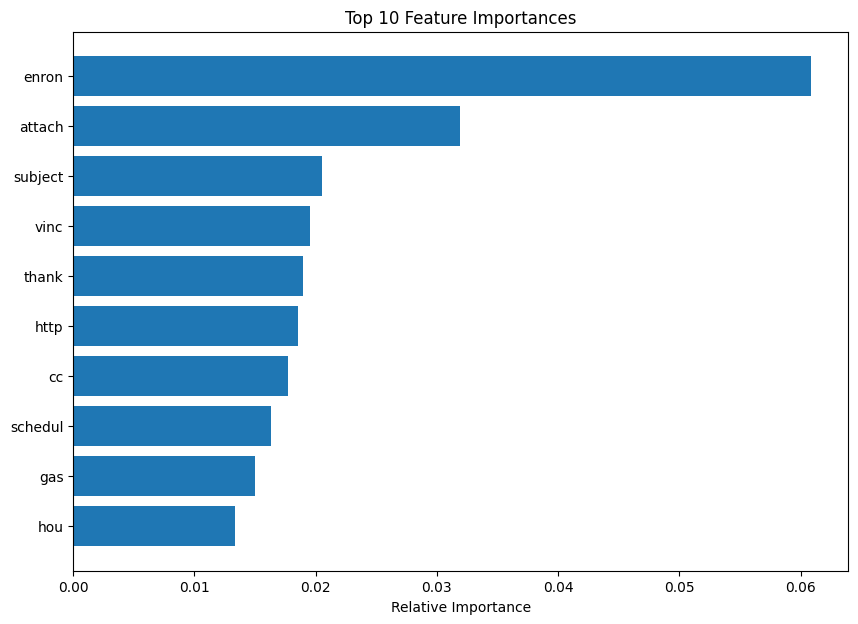

In [140]:
importances = model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i])[-10:]  # Top 10 features
plt.figure(figsize=(10, 7))
plt.barh(range(len(indices)), [importances[i] for i in indices], align='center')
plt.yticks(range(len(indices)), [vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Top 10 Feature Importances')
plt.show()

# Naive Bayes on stemmed, stop word removed data

In [141]:
from sklearn.naive_bayes import MultinomialNB

start_time = time.time()
NaiveBayesmodel = MultinomialNB().fit(X_train, y_train)
training_time = time.time() - start_time
NaiveBayesmodel.fit(X_train, y_train)

start_time = time.time()
y_pred = NaiveBayesmodel.predict(X_test)
prediction_time = time.time() - start_time

In [142]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

Accuracy: 0.9724199288256228
              precision    recall  f1-score   support

         ham       0.98      0.96      0.97      3276
        spam       0.97      0.98      0.97      3468

    accuracy                           0.97      6744
   macro avg       0.97      0.97      0.97      6744
weighted avg       0.97      0.97      0.97      6744

Training Time: 2.431307077407837 seconds
Prediction Time: 0.24361801147460938 seconds


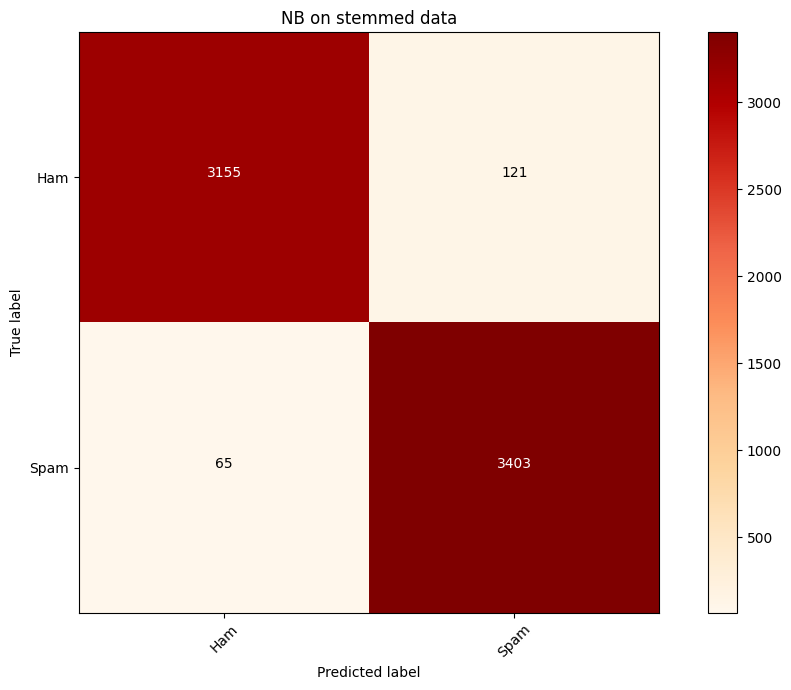

In [143]:
plot_confusion_matrix(y_test, y_pred, class_labels=None, title='NB on stemmed data',cmap='OrRd')

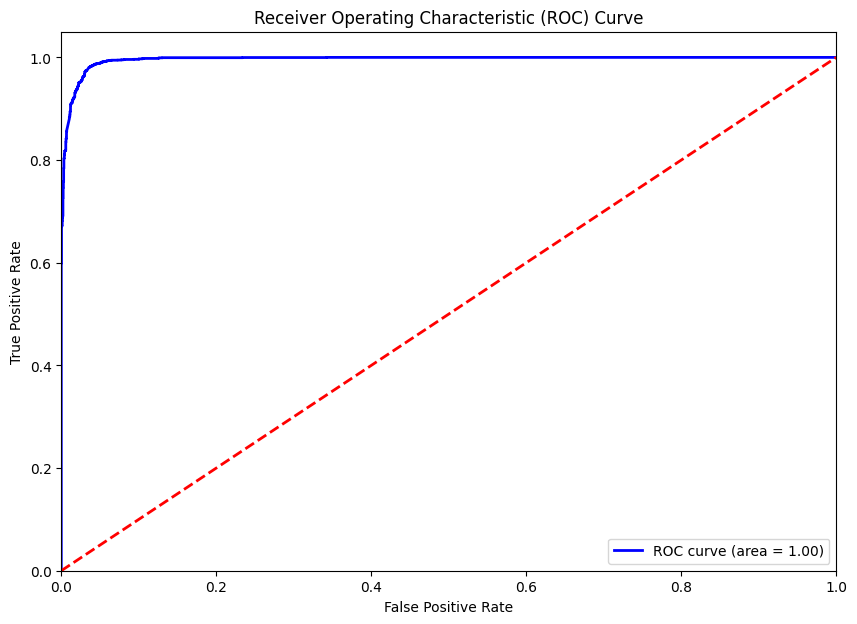

In [144]:
# ROC Curve
y_prob = NaiveBayesmodel.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Cross valiation 

In [145]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(NaiveBayesmodel, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.96648873 0.96559395 0.98175886 0.96618716 0.95165357]
Mean accuracy: 0.9663364529517805


Naive Bayes performs better on punctuation, numerical removed UNSTEMMED data that did not have stop word removal performed. Whereas, Random Trees perform better on STEMMED, stopword removed, punctuation, numerical removed data 

## Fine tuning Naive Bayes

## - grid search

Best Hyperparameters: {'alpha': 0.001}
Best Grid Search CV Score: 0.9749000416829464
Accuracy: 0.9737544483985765
              precision    recall  f1-score   support

         ham       0.98      0.97      0.97      3276
        spam       0.97      0.98      0.97      3468

    accuracy                           0.97      6744
   macro avg       0.97      0.97      0.97      6744
weighted avg       0.97      0.97      0.97      6744

Training Time: 89.95675086975098 seconds
Prediction Time: 0.21934223175048828 seconds


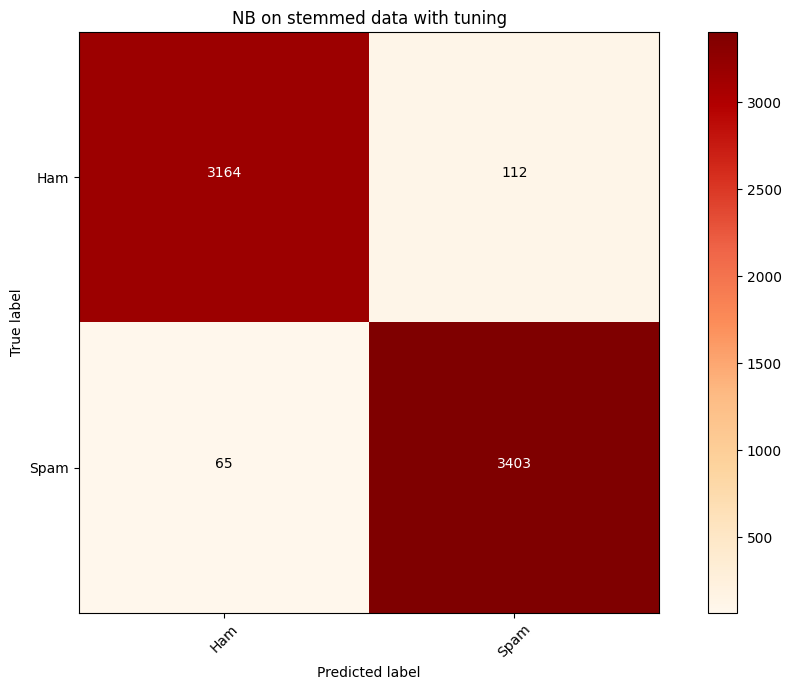

In [146]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],}

start_time = time.time()
grid_search = GridSearchCV(MultinomialNB(), parameter_grid, cv=5)
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

start_time = time.time()
y_pred = best_model.predict(X_test)
prediction_time = time.time() - start_time

print("Best Hyperparameters:", best_params)
print("Best Grid Search CV Score:", grid_search.best_score_)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")
plot_confusion_matrix(y_test, y_pred, class_labels=None, title='NB on stemmed data with tuning',cmap='OrRd')

## Cross validation 

In [147]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(best_model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.96723013 0.96885659 0.98250037 0.96781848 0.95372979]
Mean accuracy: 0.9680270731089875
